In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Input


In [ ]:
pip install -U ipykernel

In [2]:
import zipfile

# Get the path to the zip file.
zip_file_path = '/Users/hardikyadav/Desktop/campusX/Age and Gender.zip'

# Create a zipfile object from the zip file path.
data = zipfile.ZipFile(zip_file_path)

# Extract the contents of the zip file to the current directory.
data.extractall()

In [3]:
df = '/Users/hardikyadav/Desktop/campusX/UTKFace'

In [4]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(df)):
    image_path = os.path.join(df,filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
data = pd.DataFrame()
data['image'],data['age'],data['gender'] = image_paths,age_labels,gender_labels

In [21]:
data.head(5)

,image,age,gender
0,/Users/hardikyadav/Desktop/campusX/UTKFace/9_1...,9,1
1,/Users/hardikyadav/Desktop/campusX/UTKFace/36_...,36,0
2,/Users/hardikyadav/Desktop/campusX/UTKFace/86_...,86,1
3,/Users/hardikyadav/Desktop/campusX/UTKFace/26_...,26,1
4,/Users/hardikyadav/Desktop/campusX/UTKFace/1_1...,1,1


In [20]:
gender_dict = {0:'Male',1:'Female'}

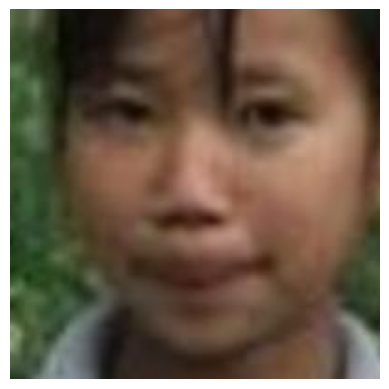

In [40]:
from PIL import Image
img = Image.open(data['image'][0])
plt.axis('off')
plt.imshow(img)

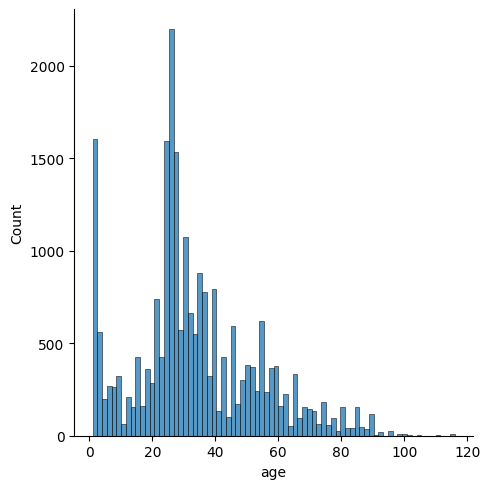

In [39]:
sns.displot(data['age'])

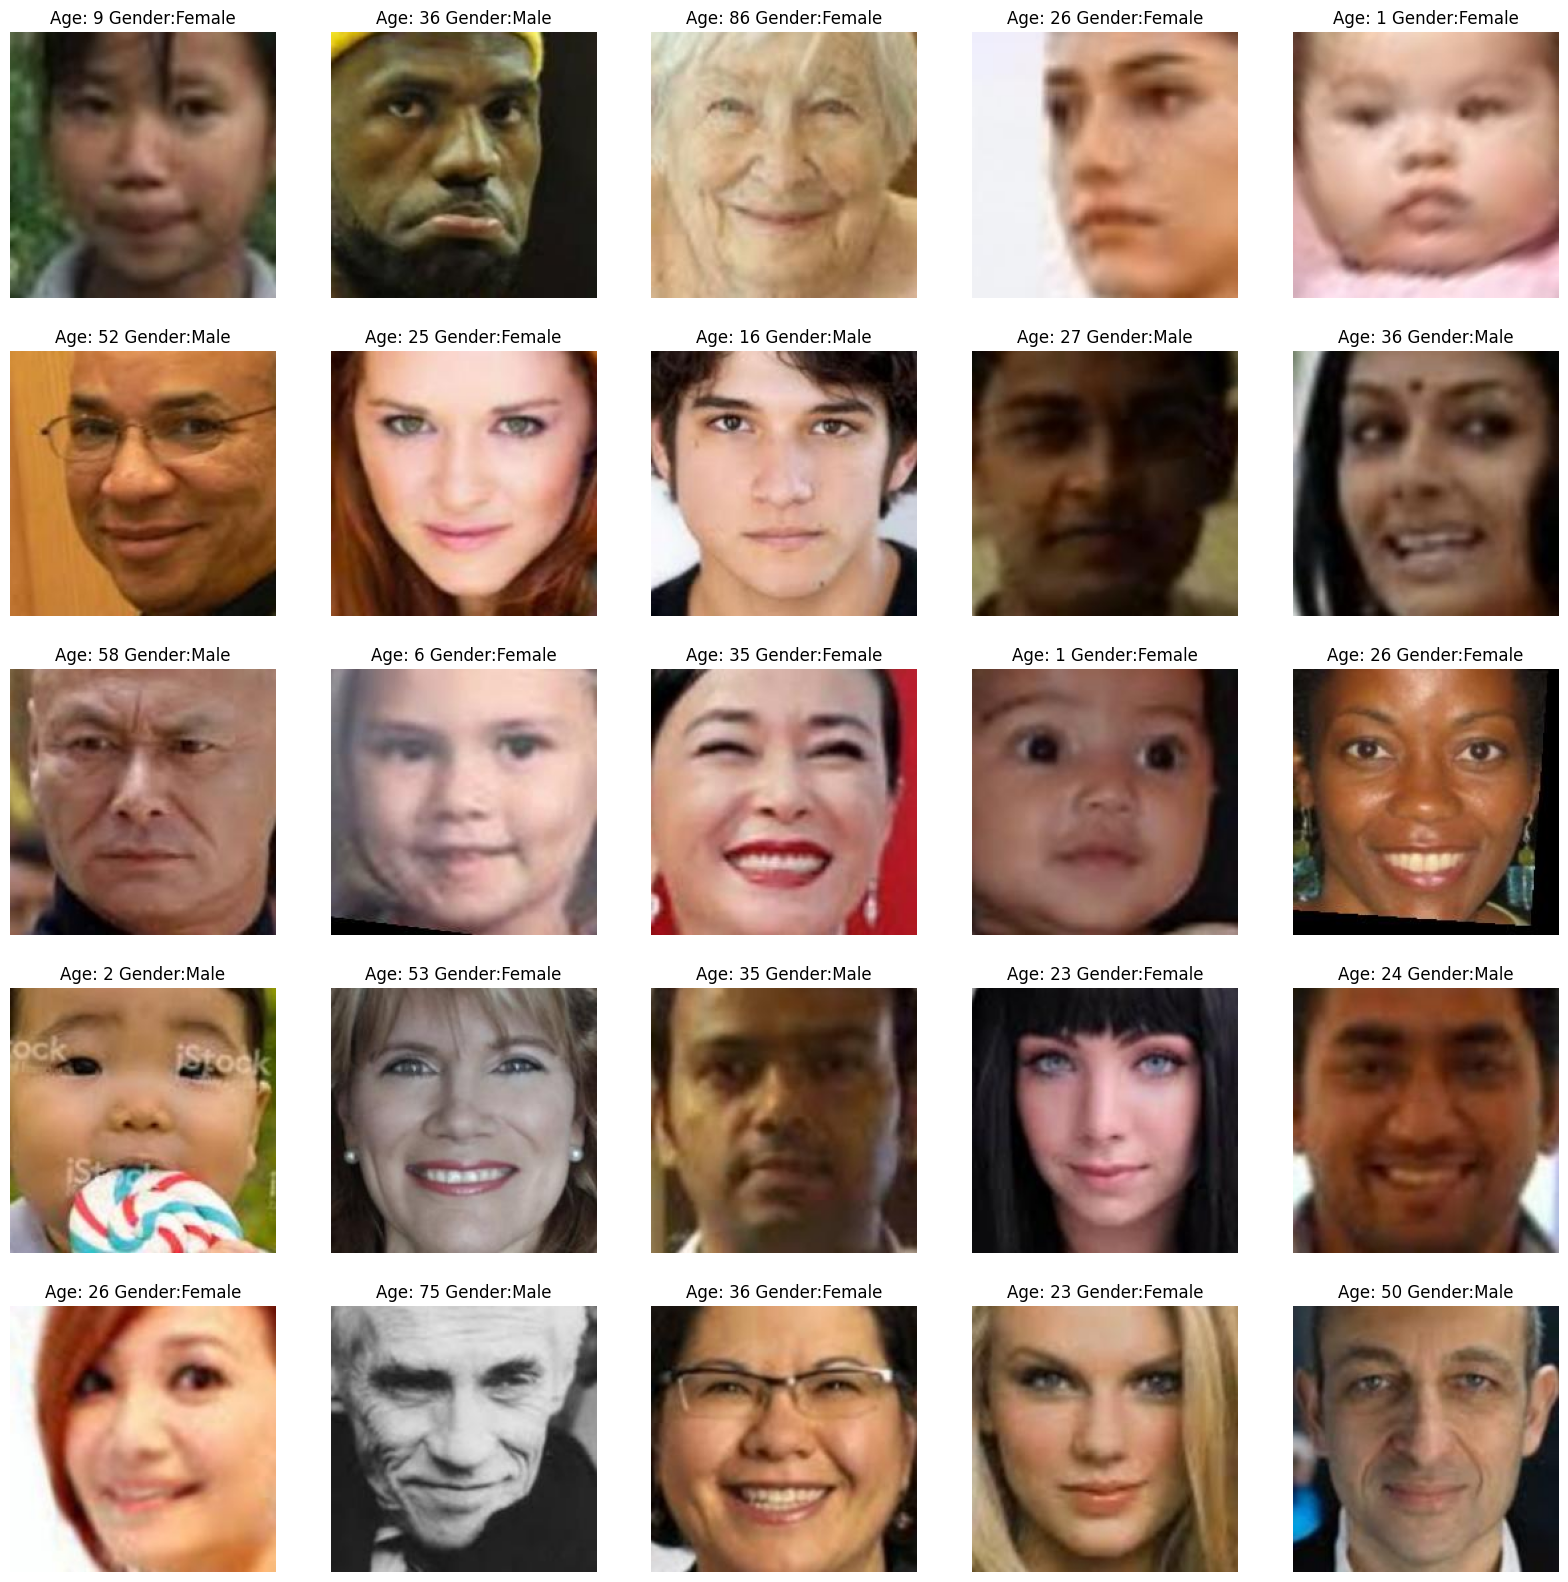

In [45]:
plt.figure(figsize=(20,20))
files = data.iloc[0:25]

for index,file,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender:{gender_dict[gender]}")
    plt.axis('off')

In [78]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    #features = features.reshape(len(features), 128, 128, 1)
    return features

In [79]:
X = extract_features(data['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [49]:
X.shape


(23708, 128, 128, 1)

In [50]:
X = X/255.0

In [51]:
#y_gender = np.array(data['gender'])
#y_age = np.array(data['age'])

In [68]:
'''import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the LabelEncoder object to the data
encoder.fit(data['age'])

# Transform the data
encoded_data = encoder.transform(data['age'])

# Create the categorical tensor
y_age = tf.keras.utils.to_categorical(encoded_data, 110)'''

In [73]:
y_gender = np.array(data['gender'])
y_age = np.array(data['age'])

In [72]:
#y_gender = tf.keras.utils.to_categorical(data['gender'], 10)

In [66]:
input_shape = (128,128,1)

In [54]:
#model 1

'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolution layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

# Dense layer 2
model.add(Dense(32, activation='softmax'))

model.add(Dense(1, activation='linear'))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()'''


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [75]:
#history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=10, validation_split=0.2)


In [76]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [84]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
593/593 [==============================] - 121s 203ms/step - loss: 20.2274 - gender_out_loss: 0.7870 - age_out_loss: 19.4405 - gender_out_accuracy: 0.5234 - age_out_accuracy: 0.0468 - val_loss: 33.3585 - val_gender_out_loss: 0.6922 - val_age_out_loss: 32.6663 - val_gender_out_accuracy: 0.5190 - val_age_out_accuracy: 0.0493
Epoch 2/5
593/593 [==============================] - 128s 216ms/step - loss: 14.0032 - gender_out_loss: 0.6923 - age_out_loss: 13.3110 - gender_out_accuracy: 0.5234 - age_out_accuracy: 0.0469 - val_loss: 32.9941 - val_gender_out_loss: 0.6907 - val_age_out_loss: 32.3034 - val_gender_out_accuracy: 0.5188 - val_age_out_accuracy: 0.0493
Epoch 3/5
593/593 [==============================] - 131s 220ms/step - loss: 13.1838 - gender_out_loss: 0.6921 - age_out_loss: 12.4917 - gender_out_accuracy: 0.5236 - age_out_accuracy: 0.0469 - val_loss: 32.6914 - val_gender_out_loss: 0.6924 - val_age_out_loss: 31.9990 - val_gender_out_accuracy: 0.5188 - val_age_out_accuracy: 0.